In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def get_jpeg_files():
    os.getcwd()
    os.listdir()
    path = os.getcwd()
    path = os.getcwd()
    jpg_files = [f for f in os.listdir(path) if f.endswith('.jpg')]
    return jpg_files

get_jpeg_files()

['canakkale.jpg']

In [15]:
def display_two_image(im_1, im_2):
    
    plt.subplot(1,2,1)
    plt.imshow(im_1)
    
    plt.subplot(1,2,2)
    plt.imshow(im_2)
    
    plt.show()

In [16]:
def rotate_by_i_j_swap(im_1):
    m, n, k = im_1.shape
    new_image = np.zeros((n,m,k), dtype = 'uint8')
    
    for i in range(m):
        for j in range(n):
            temp = im_1[i,j]
            new_image[j,i] = temp
    return new_image        

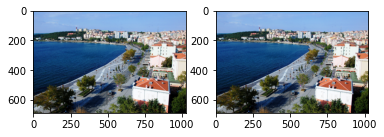

In [17]:
image_1 = plt.imread('canakkale.jpg')
image_2 = rotate_by_i_j_swap(image_1)
image_3 = rotate_by_i_j_swap(image_2)
display_two_image(image_1, image_3)

In [18]:
def rotate_one_point_with_theta_counterclockwise(point,angle):
    '''
    point : a pair of x,y indicating the location of the pixel
    angle : angle in degrees
    
    '''

    theta = np.radians(angle)    #convert angles to radians

    r = np.array(( (np.cos(theta), -np.sin(theta)), (np.sin(theta), np.cos(theta)) ))
    
    #print('rotation matrix:')
    #print(r)

    v = np.array(point)
    
    #print('vector v:')
    #print(v)
    
    #print('apply the rotation matrix r to v: r*v')
    #print(r.dot(v).astype(int))

    return r.dot(v).astype(int)

In [19]:
def get_all_new_location(im_1, angle):
    m, n, k = im_1.shape
    new_location_points = []
    for i in range(m):
        for j in range(n):
            new_location_points.append(rotate_one_point_with_theta_counterclockwise([i,j], angle))
            
    return new_location_points

In [20]:
def get_min_max(new_location_points):
    min_x, min_y = new_location_points[0][0], new_location_points[0][1] 
    max_x, max_y = new_location_points[0][0], new_location_points[0][1]
    s1 = len(new_location_points)

    for s in range(s1):
        
        if min_x > new_location_points[s][0]:
            min_x = new_location_points[s][0]
        if max_x < new_location_points[s][0]:
            max_x = new_location_points[s][0]
        
        if min_y > new_location_points[s][1]:
            min_y = new_location_points[s][1]
        if max_y < new_location_points[s][1]:
            max_y = new_location_points[s][1]
            
    return min_x, min_y, max_x, max_y

In [21]:
new_location_points = get_all_new_location(image_1, 90)
min_x, min_y, max_x, max_y = get_min_max(new_location_points)
# rotate_with_theta_counterclockwise([0,1], 90)
rotate_one_point_with_theta_counterclockwise([0,1], 90)

array([-1,  0])

In [22]:
def rotate_an_image(im_1, angle):
    
    m, n, k = im_1.shape
    new_location_points = get_all_new_location(im_1, angle)

    min_x, min_y, max_x, max_y = get_min_max(new_location_points)

    new_m = max_x - min_x + 1
    new_n = max_y - min_y + 1

    x_offset = 0 - min_x
    y_offset = 0 - min_y
    
    # new_m, new_n, x_offset, y_offset

    new_image_2 = np.zeros((new_m, new_n, 3), dtype='uint8')

    for i in range(m):
        for j in range(n):
            new_i, new_j = rotate_one_point_with_theta_counterclockwise([i,j], angle)
            new_image_2[new_i+x_offset, new_j+y_offset] = image_1[i,j]
            
    return new_image_2

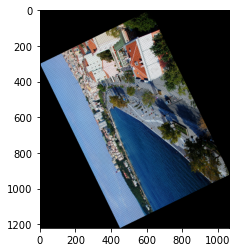

In [23]:
i_1 = rotate_an_image(image_1, 116)
plt.imshow(i_1)
plt.show()

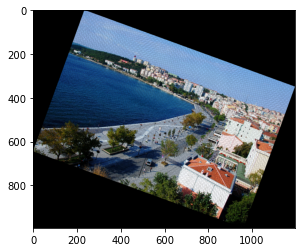

In [24]:
i_1 = rotate_an_image(image_1, -20)
plt.imshow(i_1)
plt.show()